# **Import Library**

In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [57]:
plt.style.use('seaborn')

# **Data Loading**

[**Coronavirus tweets NLP - Text Classification**](https://www.kaggle.com/datatattle/covid-19-nlp-text-classification)

Perform Text Classification on the data. The tweets have been pulled from Twitter and manual tagging has been done then.

The names and usernames have been given codes to avoid any privacy concerns.

Columns:

1) Location

2) Tweet At

3) Original Tweet

4) Label

  * Negative
  * Positive
  * Neutral
  * Extremely Positive
  * Extremely Negative

Akan tetapi akan di reduced menjadi 3 kategori saja :

  * Negative
  * Positive
  * Neutral


Data yang digunakan berasalh dari Dataset dari kaggle yang memiliki dua dataset:

* Corona_NLP_test.csv
* Corona_NLP_train.csv

Tapi karena kebutuhan submission Validation set sebesar 20% dari total dataset, maka yang digunakan hanya dataset Corona_NLP_train.csv saja.

In [58]:
import pandas as pd
df_tweets = pd.read_csv('https://drive.google.com/uc?id=1W9fvHCd2FVyEvL0-JdgygKDFf9kqjp0x', encoding='L1')

df_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Menampilkan daftar columns

In [59]:
df_tweets.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

Pada kolom Sentiment tertera label dari tweet.

In [60]:
df_tweets['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

Ada 41157 baris data yang berarti ada 41157 tweets

6 kolom yang berarti 6 columns (Features). Namunyang dibutuhkan pada pengujian klasifikasi hanya 2 features yakni 'OriginalTweet' dan 'Sentiment'.

In [61]:
# the shape of data
print('Total Row:', df_tweets.shape[0])
print('Total Columns:', df_tweets.shape[1])
df_tweets.shape

Total Row: 41157
Total Columns: 6


(41157, 6)

# **Data Visualization**

Visualisasi banyak category sentiment dari tweets

Karena akan di reduced menjadi 3 categori, maka Extremely Positive akan diubah menjadi Positif dan Extremely Negative diubah menjadi Negative.

In [62]:
df_tweets.loc[df_tweets['Sentiment'] == 'Extremely Positive', 'Sentiment'] = 'Positive'
df_tweets.loc[df_tweets['Sentiment'] == 'Extremely Negative', 'Sentiment'] = 'Negative'

In [63]:
df_tweets['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

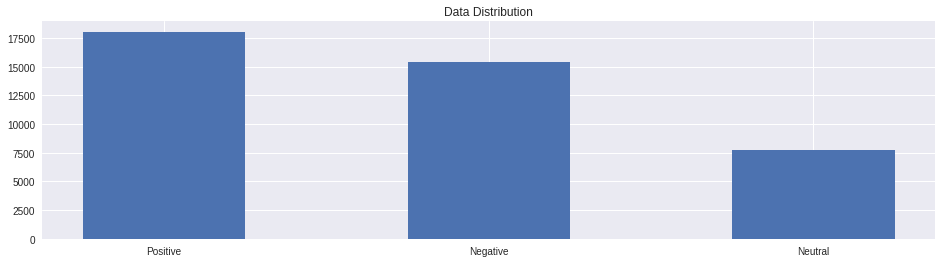

In [64]:
fig = plt.figure(figsize=(16, 4))

category = df_tweets['Sentiment'].value_counts()

plt.bar(x=category.index, height=category.values, width=0.5)

plt.title('Data Distribution')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


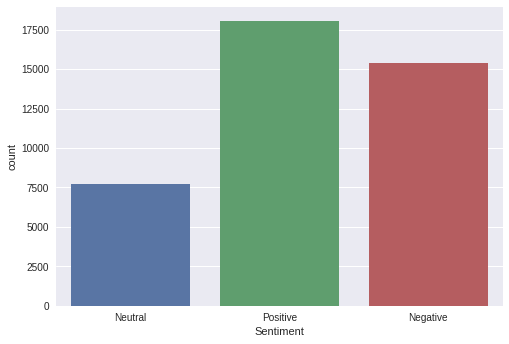

In [65]:
sns.countplot(df_tweets['Sentiment'])

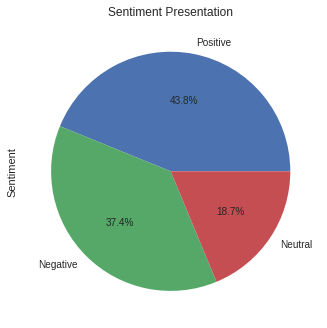

In [66]:
category = df_tweets['Sentiment'].value_counts()
label = category.index
category.plot(kind='pie', labels=label, autopct='%1.1f%%')
plt.title('Sentiment Presentation')
plt.show()

# **Data Preprocessing**

Data yang dibutuhkan sebagai features adalah OriginalTweet dan Sentiment. Maka selain itu akan di drop.

In [67]:
df_tweets.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive


In [68]:
df_tweets = df_tweets.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt'])

In [69]:
df_tweets.head(2)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive


**Handling Missing Value**

Untuk mengefektifkan model dalam mempelajari data dilakukan cleaning data dari missing value. Namun dari pengecekan data tidak memiliki missing value.

In [70]:
df_tweets.isnull().any()

OriginalTweet    False
Sentiment        False
dtype: bool

**Handling Categorical Value**

Karena label sentiment berupa data kategorikal, maka kita perlu melakukan proses one-hot-encoding. Jalankan kode di bawah untuk melakukan one-hot-encoding dan membuat dataframe baru.

In [71]:
category = pd.get_dummies(df_tweets['Sentiment'])
new_df_tweets = pd.concat([df_tweets, category], axis=1)
new_df_tweets = new_df_tweets.drop(columns='Sentiment')
new_df_tweets.head()

,OriginalTweet,Negative,Neutral,Positive
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,1,0
1,advice Talk to your neighbours family to excha...,0,0,1
2,Coronavirus Australia: Woolworths to give elde...,0,0,1
3,My food stock is not the only one which is emp...,0,0,1
4,"Me, ready to go at supermarket during the #COV...",1,0,0


In [72]:
import re
from string import punctuation
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

def process_text(text):
  text = str(text) # Convert string to str
  # Lowers the string
  text = text.lower()
  # Removes the full url
  url_remove = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
  text = re.sub(url_remove,' ',text)
  # Removes the punctuation
  text = ''.join([string for string in text if string not in punctuation and not string.isdigit()])
  # Removes any more special characters
  special_character = re.compile(r'[^a-zA-Z]')
  text = re.sub(special_character,' ', text)
  text = text.strip() # Strip white spaces
  text = text.split(' ')
  text = ' '.join([string for string in text if string not in stopwords.words('english')]) # Removing all stop words
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
new_df_tweets.loc[:, ['OriginalTweet']] = new_df_tweets['OriginalTweet'].apply(process_text)

**Split Data**

Selanjutnya dilakukan ektraksi data.

Maka kita tinggal mengektraksi label dan featuresnya

Prepare Feature and Label

* `feature` data set biasa disebut independent data set (X), yakni columns

* `target` data set also known as the dependent data set (Y)

Kemudian selanjutnya akan di split antara data training dan data testing

Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

In [74]:
tweets_column = 'OriginalTweet'
label_columns = [column for column in new_df_tweets.columns if column != 'OriginalTweet']

In [75]:
tweets = new_df_tweets[tweets_column].values
label = new_df_tweets[label_columns].values

**Tokenizing**

Kemudian kita ubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, kita perlu membuat mengonversi setiap sampel menjadi sequence.

In [76]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
 
sekuens = tokenizer.texts_to_sequences(tweets)
 
padded = pad_sequences(sekuens)

Lalu, bagi data untuk training dan data untuk testing, dengan presentasi 80% Training set dan 20% Validation set.

In [77]:
from sklearn.model_selection import train_test_split
tweets_train, tweets_test, label_train, label_test = train_test_split(padded, label, test_size=0.2 ,random_state=42)

# **Data Modelling**

Untuk arsitektur model kita menggunakan layer Embedding dengan dimensi embedding sebesar 16, serta dimensi dari input sebesar nilai num_words pada objek tokenizer. Jangan lupa panggil fungsi compile dan tentukan optimizer serta loss function yang akan dipakai oleh model.

In [78]:
embedding_vectors = 30
input = len(tokenizer.word_index)+1
input

56978

In [79]:
padded.shape[1]

46

In [80]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=input, output_dim=embedding_vectors, input_length=padded.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 46, 30)            1709340   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 46, 512)           587776    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

Selanjutnya kita buat kelas callback. fungsi yang paling penting yaitu `on_epoch_end()`. Fungsi inilah yang akan kita gunakan untuk memberitahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Kode `self.model.stop_training = True` adalah kode yang memberi tahu model untuk menghentikan pelatihan.

In [82]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai > 90%!")
      self.model.stop_training = True
callbacks = myCallback()

Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [83]:
num_epochs = 30
history = model.fit(tweets_train, label_train, epochs=num_epochs, 
                    validation_data=(tweets_test, label_test), callbacks=[callbacks], verbose=2)

Epoch 1/30
1029/1029 - 355s - loss: 0.6451 - accuracy: 0.7305 - val_loss: 0.4600 - val_accuracy: 0.8405
Epoch 2/30
1029/1029 - 349s - loss: 0.3359 - accuracy: 0.8882 - val_loss: 0.4698 - val_accuracy: 0.8390
Epoch 3/30
1029/1029 - 351s - loss: 0.2048 - accuracy: 0.9355 - val_loss: 0.5239 - val_accuracy: 0.8299
Epoch 4/30
1029/1029 - 352s - loss: 0.1388 - accuracy: 0.9554 - val_loss: 0.6107 - val_accuracy: 0.8098
Epoch 5/30
1029/1029 - 349s - loss: 0.0915 - accuracy: 0.9712 - val_loss: 0.8159 - val_accuracy: 0.7890
Epoch 6/30
1029/1029 - 355s - loss: 0.0628 - accuracy: 0.9801 - val_loss: 0.8440 - val_accuracy: 0.7873

Akurasi telah mencapai > 90%!


Akurasi dari model kita menunjukkan terjadinya overfitting karena akurasi pada data testing sangat besar, sedangkan akurasi pada data validasi jauh lebih kecil. Hal ini masih sangat luar biasa karena kita hanya memiliki 1000 buah sampel data!

**Plot Loss dan Akurasi**

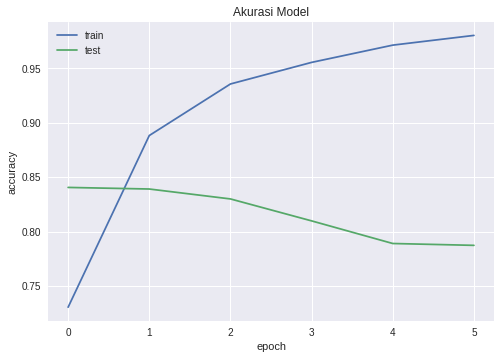

In [84]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

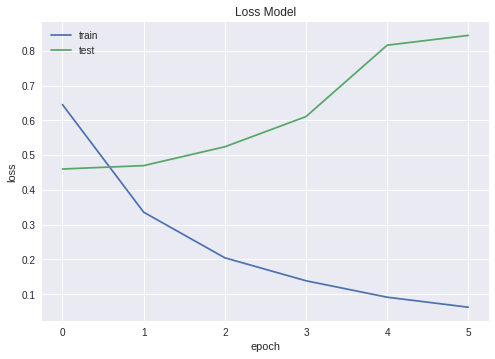

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()